In [59]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from keras.datasets import mnist, cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from IPython.display import clear_output
import random
from sklearn.cluster import AgglomerativeClustering

In [112]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train= np.concatenate([x_train, x_test])
x_train = x_train.astype('float32')/255.
x_train=x_train[:10000,:]
x_train[i].shape

(32, 32, 3)

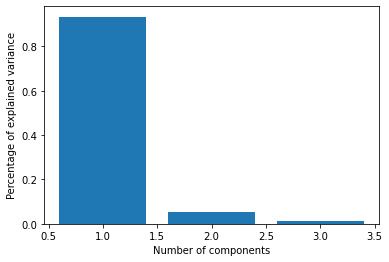

0.9336541891098022


In [21]:
C = pcaR.fit(x_train.shape).transform(x_train)
explained_variance_ratio = pcaR.explained_variance_ratio_

n_bars = 3
x = np.arange(1, n_bars + 1)
plt.bar(x, explained_variance_ratio[:n_bars])

plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.show()

print(sum([explained_variance_ratio[i] for i in range(1)]))

In [61]:
test=x_train[0].reshape(-1,3)
test.shape
x_train = x_train.astype('float32')/255.

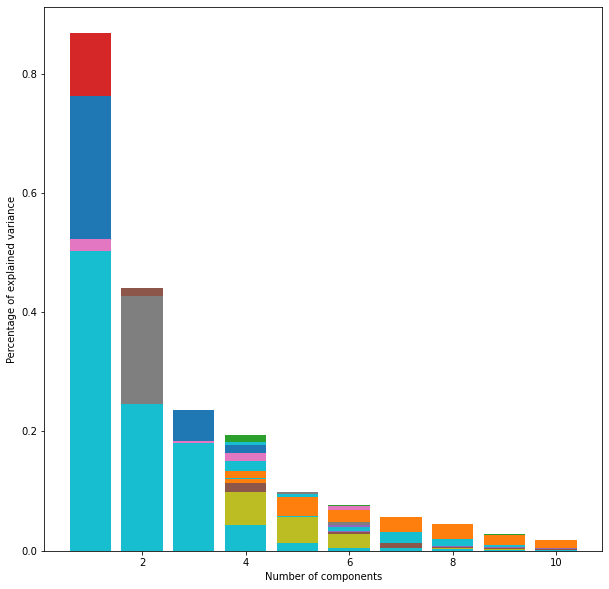

In [83]:
n=1000
tot=[]
tot1=[]
tot2=[]
tot3=[]
tot4=[]
pcaR = PCA()
l = [random.randint(0, 2000) for i in range(n)]
plt.figure(figsize=(10,10))
for i in range(n):
    #plt.subplot(5,3,i+1)
    C = pcaR.fit(x_train[l[i]])
    explained_variance_ratio = pcaR.explained_variance_ratio_

    n_bars = 10
    x = np.arange(1, n_bars + 1)
    plt.bar(x, explained_variance_ratio[:n_bars])
    plt.xlabel("Number of components")
    plt.ylabel("Percentage of explained variance")
    tot+=[explained_variance_ratio[0]]
    tot1+=[explained_variance_ratio[1]]
    tot2+=[explained_variance_ratio[2]]
    tot3+=[explained_variance_ratio[3]]
    tot4+=[explained_variance_ratio[4]]
sum_4=np.array(tot)+np.array(tot1)+np.array(tot2)+np.array(tot3)
sum_5=np.array(tot)+np.array(tot1)+np.array(tot2)+np.array(tot3)+np.array(tot4)

In [81]:
np.array(tot)+np.array(tot1)

array([0.63189995, 0.70966065, 0.582572  , 0.5616421 , 0.7870631 ,
       0.6111965 ], dtype=float32)

median 4 dim: 0.9109971523284912
median 5 dim: 0.9534310698509216


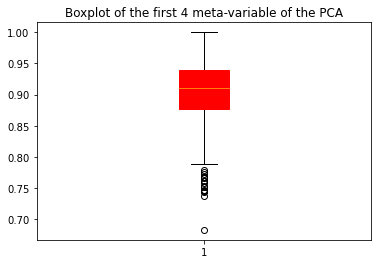

In [94]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of the first 4 meta-variable of the PCA')
ax1.boxplot(sum_4, patch_artist=True, boxprops=dict(facecolor='red', color='red'))
median_value = np.percentile(sum_4, 50) 
print("median 4 dim:",median_value) 
print("median 5 dim:",np.percentile(sum_5, 50) )

In [100]:
pcaR.fit(x_train[2]).transform(x_train[2])[:,0]

array([-0.6968512 , -0.6968512 , -0.6968512 , -0.6968512 , -0.6968512 ,
       -0.7215661 , -0.49232516, -0.28242123, -0.02094102,  0.2641239 ,
        0.38725987,  0.5642208 ,  0.7611984 ,  0.8872214 ,  1.6307813 ,
        2.3585863 ,  1.0637252 , -0.05673763, -0.19691302, -0.19691302,
       -0.13078323, -0.12857752, -0.02870256, -0.02740389, -0.05902365,
       -0.6968512 , -0.6968512 , -0.6968512 ], dtype=float32)

In [101]:
liste_PCA=[]
j=0
for i in range (len(x_train)):
    if (j%100)==0 :
        clear_output(wait=True)
        print((j/len(x_train))*100)
    liste_PCA += [pcaR.fit(x_train[i]).transform(x_train[i])[:,:3]]
    j+=1

99.0


In [109]:
liste_PCA=np.array(liste_PCA)
liste_PCA=liste_PCA.reshape(len(liste_PCA), np.prod(liste_PCA.shape[1:]))
liste_PCA.shape

(10000, 84)

In [66]:
list_taille_clusters=np.arange(1,160,4)

In [110]:
list_clusters=[]
j=0
for i in list_taille_clusters:
    if (0)==0 :
        clear_output(wait=True)
        print((j/len(list_taille_clusters))*100)
    kmeans = KMeans(n_clusters=i) #sqrt(n)=K
    list_clusters+= [kmeans.fit_predict(liste_PCA)]
    j+=1

97.5


In [69]:
list_clusters=[]
j=0
for i in list_taille_clusters:
    clear_output(wait=True)
    print((j/len(list_taille_clusters))*100)
    ac = AgglomerativeClustering(n_clusters=i)
    clusters = ac.fit(liste_PCA)
    list_clusters+= [clusters.labels_]
    j+=1

97.5


In [111]:
for i in range (len(list_clusters)):
    path=".\Clusters\PCAKm"+list_taille_clusters[i].astype(str) +".npy "
    np.save(path, list_clusters[i])

In [22]:
list_clusters

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 0, 0, 3], dtype=int64),
 array([1, 5, 4, ..., 4, 5, 2], dtype=int64),
 array([6, 2, 0, ..., 0, 2, 5], dtype=int64),
 array([ 2,  9,  3, ...,  3, 16,  5], dtype=int64),
 array([ 4,  9, 20, ..., 20, 16,  0], dtype=int64),
 array([ 4,  9, 20, ..., 20, 16, 10], dtype=int64),
 array([27,  4,  9, ...,  9,  7, 10], dtype=int64),
 array([27, 31,  9, ...,  9,  7,  1], dtype=int64),
 array([27, 31,  9, ...,  9, 33, 35], dtype=int64),
 array([27, 31,  9, ...,  9, 33, 17], dtype=int64),
 array([27, 15,  9, ...,  9, 16, 17], dtype=int64),
 array([27, 15,  9, ...,  9, 16, 17], dtype=int64),
 array([13, 15,  1, ...,  1, 16,  8], dtype=int64),
 array([13, 15, 10, ..., 55, 16,  8], dtype=int64),
 array([ 6,  3, 10, ..., 55, 16,  8], dtype=int64),
 array([ 6, 37, 10, ..., 55,  7,  3], dtype=int64),
 array([44, 37,  4, ..., 55,  7,  0], dtype=int64),
 array([44, 37, 39, ..., 55,  3, 42], dtype=int64),
 array([44, 37, 39, ..., 55, 46, 42]